In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
import shap

c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#loaded the dataset
data_set = pd.read_csv('loan_data.csv')
shuffled_data_set = data_set.sample(frac=1, random_state=42).reset_index(drop=True)
print(shuffled_data_set)


       person_age person_gender person_education  person_income  \
0            32.0          male        Associate        96865.0   
1            24.0          male        Associate        56838.0   
2            22.0        female           Master        37298.0   
3            23.0        female         Bachelor        39944.0   
4            42.0          male      High School        67974.0   
...           ...           ...              ...            ...   
44995        26.0          male      High School        88451.0   
44996        25.0        female      High School        34772.0   
44997        33.0        female        Associate        58317.0   
44998        26.0          male           Master       178602.0   
44999        26.0        female      High School       210894.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                  10              MORTGAGE     7500.0          EDUCATION   
1                   6                  RE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from keras.models import Sequential

# Reload the dataset
dataset = pd.read_csv('loan_data.csv')

# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Shuffle the dataset
shuffle_dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and test sets
train_set = shuffle_dataset[:int(len(shuffle_dataset) * 0.8)]
test_set = shuffle_dataset[int(len(shuffle_dataset) * 0.8):]

# Extract labels
train_labels = train_set['loan_status']
test_labels = test_set['loan_status']

# Define subsets of features
highly_important_features = [
    "person_income",
    "loan_amnt",
    "loan_int_rate",
    "credit_score",
    "cb_person_cred_hist_length",
    "loan_percent_income"
]

# Feature subsets for comparison
feature_subsets = [
    highly_important_features,  # Only highly important features
    train_set.drop(['loan_status'], axis=1).columns.tolist()  # All features
]

# Initialize results list
results = []

# Loop through feature subsets
for i, subset in enumerate(feature_subsets):
    print(f"Training model with feature subset {i + 1}: {subset}")
    
    # Select features
    train_features = train_set[subset]
    test_features = test_set[subset]
    
    # Normalize the features
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    test_features = scaler.transform(test_features)
    
    # Create a simple neural network model
    model = Sequential()
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_features.shape[1],)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Use model checkpointing
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'best_model_subset_{i + 1}.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
    
    # Train the model
    history = model.fit(
        train_features,
        train_labels,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[checkpoint_callback]
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_features, test_labels)
    predictions = (model.predict(test_features) > 0.5).astype("int32")
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    # Append results
    results.append({
        "Feature Subset": f"Subset {i + 1} ({'Highly Important Features' if i == 0 else 'All Features'})",
        "Test Accuracy": f"{test_accuracy * 100:.2f} %",
        "Precision": f"{precision * 100:.2f} %",
        "Recall": f"{recall * 100:.2f} %",
        "F1 Score": f"{f1:.4f}"
    })

# Create a results table
results_table = pd.DataFrame(results)

# Display the results table
print("\nModel Performance Comparison:")
print(results_table)

# Save the results table to a CSV file for further analysis
results_table.to_csv("feature_comparison_results.csv", index=False)

Training model with feature subset 1: ['person_income', 'loan_amnt', 'loan_int_rate', 'credit_score', 'cb_person_cred_hist_length', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4384 - loss: 0.9230

900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4385 - loss: 0.9229 - val_accuracy: 0.7518 - val_loss: 0.5823
Epoch 2/10
894/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.5357

900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7736 - loss: 0.5355 - val_accuracy: 0.8028 - val_loss: 0.4517
Epoch 3/10
891/900 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8126 - loss: 0.4393

900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8126 - loss: 0.4392 - val_accuracy: 0.8233 - val_loss: 0.4131
Epoch 4/10
879/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.4163

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8207 - loss: 0.4162 - val_accuracy: 0.8269 - val_loss: 0.4002
Epoch 5/10
893/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4014

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8313 - loss: 0.4014 - val_accuracy: 0.8288 - val_loss: 0.3954
Epoch 6/10
874/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.4005

900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8269 - loss: 0.4005 - val_accuracy: 0.8292 - val_loss: 0.3930
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8285 - loss: 0.3974 - val_accuracy: 0.8290 - val_loss: 0.3917
Epoch 8/10
886/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.3977

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8273 - loss: 0.3977 - val_accuracy: 0.8301 - val_loss: 0.3907
Epoch 9/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8266 - loss: 0.3980 - val_accuracy: 0.8300 - val_loss: 0.3899
Epoch 10/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8246 - loss: 0.4044 - val_accuracy: 0.8294 - val_loss: 0.3892
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8270 - loss: 0.3876
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with feature subset 2: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_gender_male', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_P

c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


886/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5493 - loss: 0.7635

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5514 - loss: 0.7610 - val_accuracy: 0.8486 - val_loss: 0.4223
Epoch 2/10
888/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3864

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8700 - loss: 0.3860 - val_accuracy: 0.8921 - val_loss: 0.3130
Epoch 3/10
884/900 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8902 - loss: 0.3025

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8902 - loss: 0.3023 - val_accuracy: 0.8944 - val_loss: 0.2717
Epoch 4/10
869/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8963 - loss: 0.2672

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8963 - loss: 0.2671 - val_accuracy: 0.8963 - val_loss: 0.2519
Epoch 5/10
891/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - loss: 0.2499

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8951 - loss: 0.2499 - val_accuracy: 0.8972 - val_loss: 0.2411
Epoch 6/10
895/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.2460

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8934 - loss: 0.2460 - val_accuracy: 0.8975 - val_loss: 0.2350
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8953 - loss: 0.2384 - val_accuracy: 0.8971 - val_loss: 0.2312
Epoch 8/10
899/900 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8974 - loss: 0.2313

900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8974 - loss: 0.2313 - val_accuracy: 0.8985 - val_loss: 0.2288
Epoch 9/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.2286 - val_accuracy: 0.8976 - val_loss: 0.2274
Epoch 10/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8957 - loss: 0.2299 - val_accuracy: 0.8978 - val_loss: 0.2259
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.2226
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model Performance Comparison:
                         Feature Subset Test Accuracy Precision   Recall  \
0  Subset 1 (Highly Important Features)       82.54 %   68.04 %  39.78 %   
1               Subset 2 (All Features)       89.76 %   78.18 %  74.49 %   

  F1 Score  
0   0.5021  
1   0.7629  


Training model with feature: person_age


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with feature: person_income
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_emp_exp


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_amnt


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_int_rate


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with feature: loan_percent_income


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: cb_person_cred_hist_length


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with feature: credit_score


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_gender_male


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_education_Bachelor


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_education_Doctorate


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
Training model with feature: person_education_High School


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with feature: person_education_Master


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training model with feature: person_home_ownership_OTHER


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_home_ownership_OWN


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_home_ownership_RENT


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_intent_EDUCATION


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_intent_HOMEIMPROVEMENT


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_intent_MEDICAL


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with feature: loan_intent_PERSONAL


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_intent_VENTURE


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training model with feature: previous_loan_defaults_on_file_Yes


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Single Feature Performance Comparison:
                               Feature  Validation Accuracy  Precision  \
0                           person_age            77.877778   0.000000   
1                        person_income            77.877778   0.000000   
2                       person_emp_exp            77.877778   0.000000   
3                            loan_amnt            77.877778   0.000000   
4                        loan_int_rate            79.188889  61.478599   
5                  loan_percent_income            81.588888  72.148541   
6           cb_person_cred_hist_length            77.877778   0.000000   
7                         credit_score            77.877778   0.000000   
8                   person_gender_male            77.877778   0.000000   
9            person_education_Bachelor            77.877778   0.000000   
10          person_education_Doctorate            77.877778   0.000000   
11        person_education_High

c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


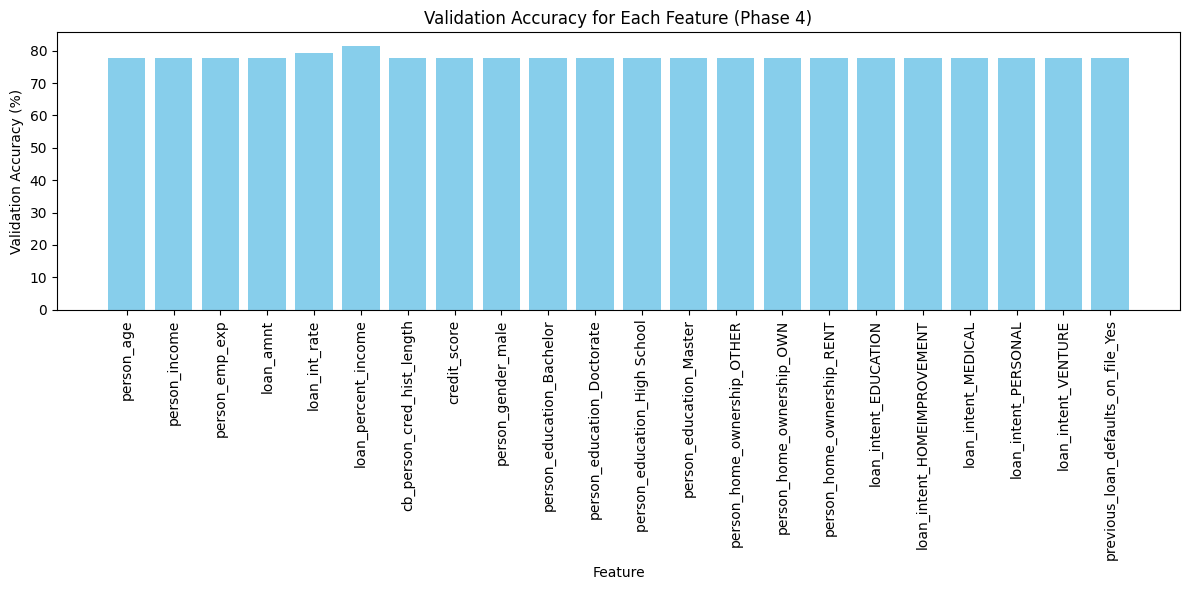

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from keras.models import Sequential

# Reload the dataset
dataset = pd.read_csv('loan_data.csv')

# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Shuffle the dataset
shuffle_dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and test sets
train_set = shuffle_dataset[:int(len(shuffle_dataset) * 0.8)]
test_set = shuffle_dataset[int(len(shuffle_dataset) * 0.8):]

# Extract labels
train_labels = train_set['loan_status']
test_labels = test_set['loan_status']

# Get all features except the label
all_features = train_set.drop(['loan_status'], axis=1).columns.tolist()

# Initialize results list
results = []

# Loop through each feature individually
for feature in all_features:
    print(f"Training model with feature: {feature}")
    
    # Select single feature
    train_features = train_set[[feature]]
    test_features = test_set[[feature]]
    
    # Normalize the features
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    test_features = scaler.transform(test_features)
    
    # Create a simple neural network model
    model = Sequential()
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_features.shape[1],)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        train_features,
        train_labels,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
    predictions = (model.predict(test_features) > 0.5).astype("int32")
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    # Append results
    results.append({
        "Feature": feature,
        "Validation Accuracy": test_accuracy * 100,  # keep raw percentage for plotting
        "Precision": precision * 100,
        "Recall": recall * 100,
        "F1 Score": f1
    })

# Create a results table
results_table = pd.DataFrame(results)

# Display the results table
print("\nSingle Feature Performance Comparison:")
print(results_table)

# Save the results table to a CSV file for backup
results_table.to_csv("single_feature_results.csv", index=False)

# Create a bar plot of validation accuracies
plt.figure(figsize=(12, 6))
plt.bar(results_table["Feature"], results_table["Validation Accuracy"], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Each Feature (Phase 4)')
plt.tight_layout()
plt.savefig('phase4_feature_importance_barplot.png')
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from keras.models import Sequential
import shap

# Reload the dataset
dataset = pd.read_csv('loan_data.csv')

# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Shuffle the dataset
shuffle_dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and test sets
train_set = shuffle_dataset[:int(len(shuffle_dataset) * 0.8)]
test_set = shuffle_dataset[int(len(shuffle_dataset) * 0.8):]

# Extract labels
train_labels = train_set['loan_status']
test_labels = test_set['loan_status']

# Get all features except the label
all_features = train_set.drop(['loan_status'], axis=1).columns.tolist()

# Initialize results list
results = []

# Step 1: Train models with individual features
for feature in all_features:
    print(f"Training model with feature: {feature}")
    
    # Select single feature
    train_features = train_set[[feature]]
    test_features = test_set[[feature]]
    
    # Normalize the features
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    test_features = scaler.transform(test_features)
    
    # Create a simple neural network model
    model = Sequential()
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_features.shape[1],)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Use model checkpointing
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'best_model_{feature}.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
    
    # Train the model
    history = model.fit(
        train_features,
        train_labels,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[checkpoint_callback],
        verbose=0
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
    predictions = (model.predict(test_features) > 0.5).astype("int32")
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    # Append results
    results.append({
        "Feature": feature,
        "Validation Accuracy": test_accuracy * 100,  # keep raw percentage for plotting
        "Precision": precision * 100,
        "Recall": recall * 100,
        "F1 Score": f1
    })

# Create a results table
results_table = pd.DataFrame(results)

# Step 2: Identify the most important feature
most_important_feature = results_table.loc[results_table['Validation Accuracy'].idxmax(), 'Feature']
print(f"\nMost Important Feature: {most_important_feature}")

# Step 3: Iteratively remove the least important features
# Sort features by importance (ascending order of validation accuracy)
sorted_features = results_table.sort_values(by='Validation Accuracy')['Feature'].tolist()

# Initialize reduced feature results
reduced_results = []

for i in range(len(sorted_features)):
    # Remove the least important features one by one
    remaining_features = sorted_features[i:]
    print(f"Training model with remaining features: {remaining_features}")
    
    # Select remaining features
    train_features = train_set[remaining_features]
    test_features = test_set[remaining_features]
    
    # Normalize the features
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    test_features = scaler.transform(test_features)
    
    # Create a simple neural network model
    model = Sequential()
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_features.shape[1],)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Use model checkpointing
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'best_model_reduced_{len(remaining_features)}.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
    
    # Train the model
    history = model.fit(
        train_features,
        train_labels,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[checkpoint_callback],
        verbose=0
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
    predictions = (model.predict(test_features) > 0.5).astype("int32")
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    # Append reduced results
    reduced_results.append({
        "Remaining Features": len(remaining_features),
        "Validation Accuracy": test_accuracy * 100,
        "Precision": precision * 100,
        "Recall": recall * 100,
        "F1 Score": f1
    })

# Create a reduced results table
reduced_results_table = pd.DataFrame(reduced_results)

# Display the reduced results table
print("\nReduced Feature Performance Comparison:")
print(reduced_results_table)

# Save the reduced results table to a CSV file
reduced_results_table.to_csv("reduced_feature_results.csv", index=False)

# Step 4: Use SHAP for model-agnostic feature importance
# Train a model with all features for SHAP analysis
train_features = train_set[all_features]
test_features = test_set[all_features]

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

model = Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_features.shape[1],)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    train_features,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Use SHAP to explain the model
explainer = shap.KernelExplainer(model.predict, train_features)
shap_values = explainer.shap_values(test_features)

# Plot SHAP summary
shap.summary_plot(shap_values, test_features, feature_names=all_features)

Training model with feature: person_age


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_income


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_emp_exp


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_amnt


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_int_rate


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with feature: loan_percent_income


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training model with feature: cb_person_cred_hist_length


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: credit_score


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_gender_male


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_education_Bachelor


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
Training model with feature: person_education_Doctorate


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training model with feature: person_education_High School


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_education_Master


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_home_ownership_OTHER


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training model with feature: person_home_ownership_OWN


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: person_home_ownership_RENT


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with feature: loan_intent_EDUCATION


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training model with feature: loan_intent_HOMEIMPROVEMENT


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with feature: loan_intent_MEDICAL

c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with feature: loan_intent_PERSONAL


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with feature: loan_intent_VENTURE


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with feature: previous_loan_defaults_on_file_Yes


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Most Important Feature: loan_percent_income
Training model with remaining features: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'credit_score', 'cb_person_cred_hist_length', 'person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training model with remaining features: ['person_income', 'person_emp_exp', 'loan_amnt', 'credit_score', 'cb_person_cred_hist_length', 'person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with remaining features: ['person_emp_exp', 'loan_amnt', 'credit_score', 'cb_person_cred_hist_length', 'person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['loan_amnt', 'credit_score', 'cb_person_cred_hist_length', 'person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['credit_score', 'cb_person_cred_hist_length', 'person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['cb_person_cred_hist_length', 'person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['person_education_Bachelor', 'person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['person_gender_male', 'person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['person_education_Master', 'person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['person_home_ownership_OTHER', 'person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with remaining features: ['person_education_Doctorate', 'person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with remaining features: ['person_education_High School', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
Training model with remaining features: ['person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['person_home_ownership_RENT', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with remaining features: ['loan_intent_HOMEIMPROVEMENT', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with remaining features: ['loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with remaining features: ['previous_loan_defaults_on_file_Yes', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with remaining features: ['loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model with remaining features: ['loan_intent_PERSONAL', 'loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with remaining features: ['loan_int_rate', 'loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training model with remaining features: ['loan_percent_income']


c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Reduced Feature Performance Comparison:
    Remaining Features  Validation Accuracy  Precision     Recall  F1 Score
0                   22            89.700001  77.708333  74.937217  0.762976
1                   21            89.666665  77.615825  74.886991  0.762270
2                   20            89.766669  77.981172  74.886991  0.764028
3                   19            89.700001  77.737226  74.886991  0.762855
4                   18            89.177775  75.930648  74.786539  0.753543
5                   17            88.900000  75.540680  73.681567  0.745995
6                   16            88.788891  75.466805  73.078855  0.742536
7                   15            88.788891  75.546306  72.928177  0.742142
8                   14            88.833332  75.570539  73.179307  0.743557
9                   13            88.733333  75.350285  72.928177  0.741194
10                  12            88.788891  75.076609  73.832245  0.744492
11    

c:\Users\corne\Downloads\AIProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


  0%|          | 0/9000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  0%|          | 0/9000 [02:44<?, ?it/s]


KeyboardInterrupt: 

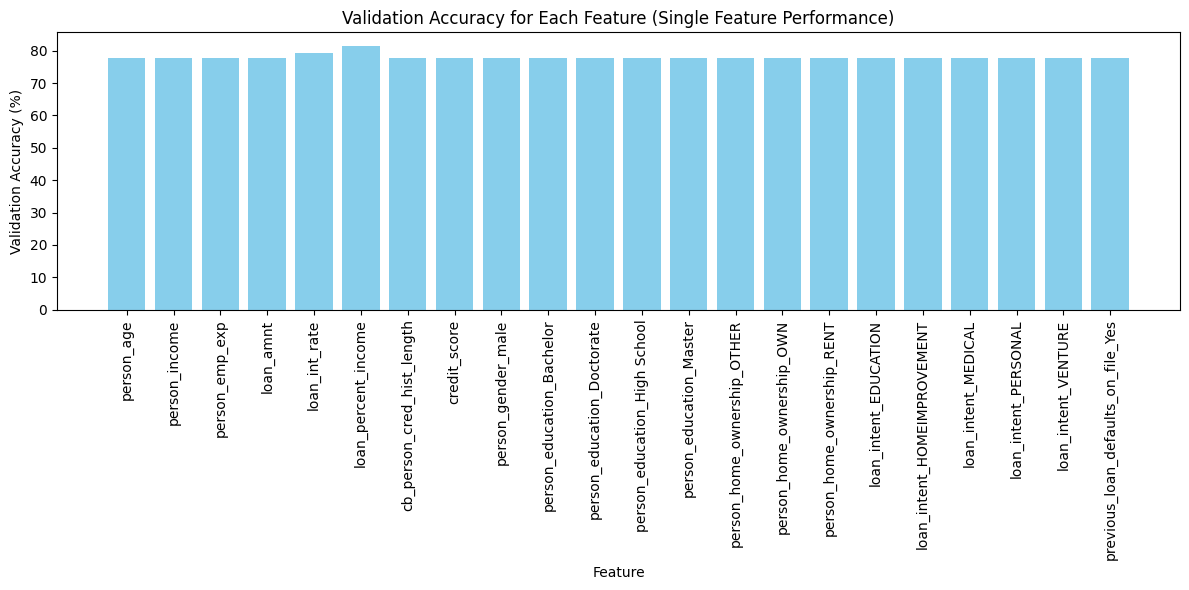

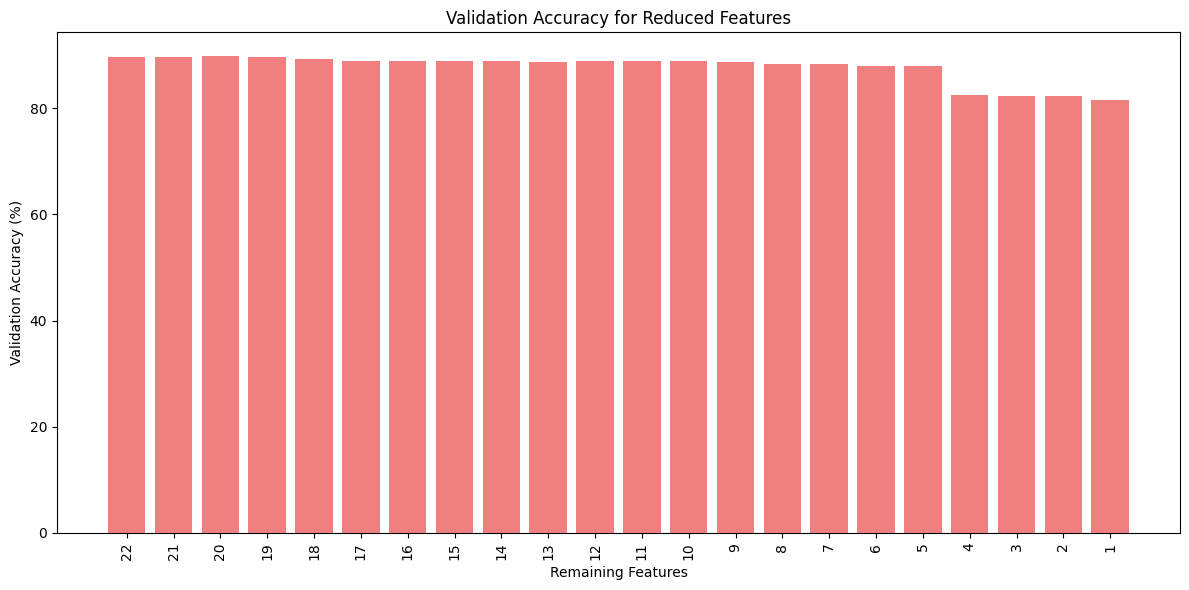

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the single feature performance results
single_feature_results = pd.read_csv("single_feature_results.csv")

# Plot the bar chart for single feature performance
plt.figure(figsize=(12, 6))
plt.bar(single_feature_results["Feature"], single_feature_results["Validation Accuracy"], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Each Feature (Single Feature Performance)')
plt.tight_layout()
plt.savefig('single_feature_performance_barplot.png')
plt.show()

# Load the reduced feature performance results
reduced_feature_results = pd.DataFrame({
    "Remaining Features": [22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "Validation Accuracy": [89.7, 89.666665, 89.766669, 89.7, 89.177775, 88.9, 88.788891, 88.788891, 88.833332, 
                            88.733333, 88.788891, 88.777781, 88.777781, 88.577777, 88.266665, 88.233334, 87.988889, 
                            87.955558, 82.366669, 82.244444, 82.211113, 81.588888]
})

# Plot the bar chart for reduced feature performance
plt.figure(figsize=(12, 6))
plt.bar(reduced_feature_results["Remaining Features"].astype(str), reduced_feature_results["Validation Accuracy"], color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel('Remaining Features')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Reduced Features')
plt.tight_layout()
plt.savefig('reduced_feature_performance_barplot.png')
plt.show()